In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import signal
import numpy.polynomial.polynomial as poly
import numpy.ma as ma
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from matplotlib.ticker import FuncFormatter
from glob import glob
#import cartopy.crs as ccrs
from IPython.display import display
#from cartopy.util import add_cyclic_point
#import cartopy
#import cartopy.crs as ccrs
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.interpolate import interp2d
#map_projection = ccrs.Mollweide
import seaborn as sns
import statsmodels.api as sm
#plt.rcParams["font.family"] = "Arial"
from scipy.stats import ttest_ind_from_stats



In [11]:
filepath = '/home/qdzhu/fs09/Stratocu-planet/Chemistry/Output/dfs/'


model_labels = [ 'AquaChem2D-VaryBVOC-VarySNOx','AquaChem2D-ConstBVOC-ConstSNOx','AquaChem2D-SNOx','AquaChem2D-BVOC']#,'AquaChem2D-LNO']



In [12]:
def generate_df_resp_global(spc, pres_opt, avg_opt):
    #spc = 'OH'
    df = pd.DataFrame()
    for model_label in model_labels:
        filename = '{}_{}_pres_{}_abs_avg_{}_global.csv'.format(model_label, spc, pres_opt, avg_opt)
        data = pd.read_csv(filepath + filename)
        df = pd.concat([df, data])

    #df = df.query("model != 'CAM-Chem' and model != 'AquaChem2D-VaryBio'")

    indx = df['model'] == 'AquaChem2D-VaryBVOC-VarySNOx'
    df.loc[indx,'model_label'] = 'Combined'
    df.loc[indx,'model_order'] = 2
    
    indx = df['model'] == 'AquaChem2D-ConstBVOC-ConstSNOx'
    df.loc[indx,'model_label'] = 'Met'
    df.loc[indx,'model_order'] = 0


    indx = df['model'] == 'AquaChem2D-SNOx'
    df.loc[indx,'model_label'] = 'SNO$_x$'
    df.loc[indx,'model_order'] = 1
    
    indx = df['model'] == 'AquaChem2D-BVOC'
    df.loc[indx,'model_label'] = 'BVOC'
    df.loc[indx,'model_order'] = 2
    
    indx = df['model'] == 'AquaChem2D-LNO'
    df.loc[indx,'model_label'] = 'LNO'
    df.loc[indx,'model_order'] = 3
    return df
    #df = df.so

In [13]:
def generate_df_resp_rel_global(spc, pres_opt, avg_opt):
    #spc = 'OH'
    df = pd.DataFrame()
    for model_label in model_labels:
        filename = '{}_{}_pres_{}_rel_avg_{}_global.csv'.format(model_label, spc, pres_opt, avg_opt)
        data = pd.read_csv(filepath + filename)
        df = pd.concat([df, data])

    #df = df.query("model != 'CAM-Chem' and model != 'AquaChem2D-VaryBio'")

    indx = df['model'] == 'AquaChem2D-VaryBVOC-VarySNOx'
    df.loc[indx,'model_label'] = 'Combined'
    df.loc[indx,'model_order'] = 2
    
    indx = df['model'] == 'AquaChem2D-ConstBVOC-ConstSNOx'
    df.loc[indx,'model_label'] = 'Met'
    df.loc[indx,'model_order'] = 0


    indx = df['model'] == 'AquaChem2D-SNOx'
    df.loc[indx,'model_label'] = 'SNO$_x$'
    df.loc[indx,'model_order'] = 1
    
    indx = df['model'] == 'AquaChem2D-BVOC'
    df.loc[indx,'model_label'] = 'BVOC'
    df.loc[indx,'model_order'] = 2
    
    indx = df['model'] == 'AquaChem2D-LNO'
    df.loc[indx,'model_label'] = 'LNO'
    df.loc[indx,'model_order'] = 3
    return df
    #df = df.so

Text(0.5, 0, '')

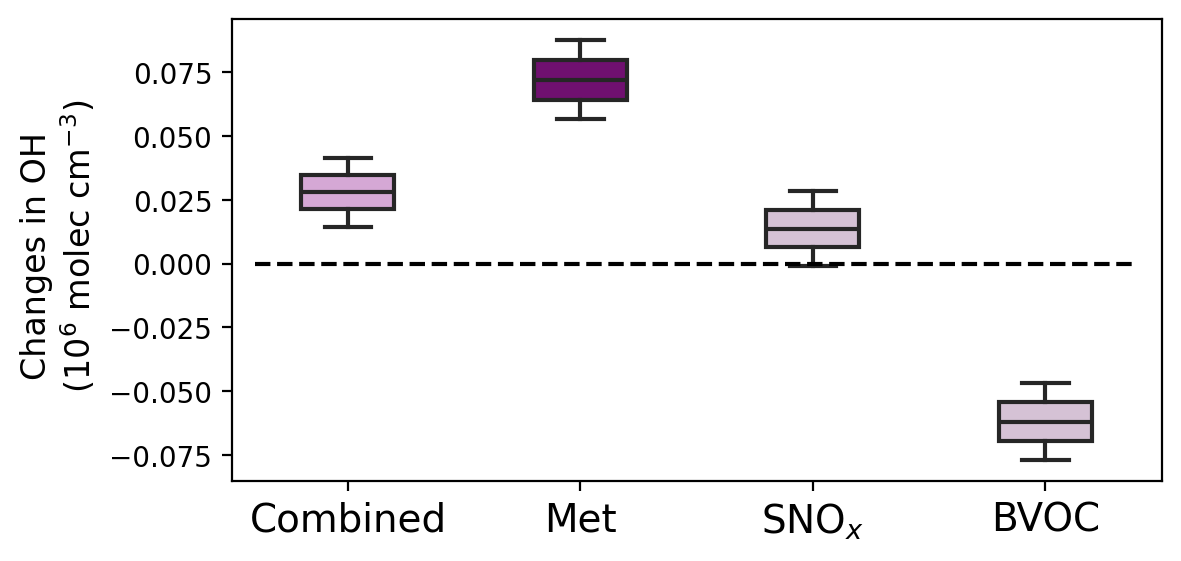

In [14]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)
spcs = ['OH']
pres_opts = ['tt']

i=0
df = generate_df_resp_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")
if i==0:
    df[spcs[i]] = df[spcs[i]]/1e6
plot = sns.boxplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Changes in OH \n (10$^{6}$ molec cm$^{-3}$)',fontsize=12)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k',linestyle='--')
axs.set_xlabel('')
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)

Text(0.5, 0, '')

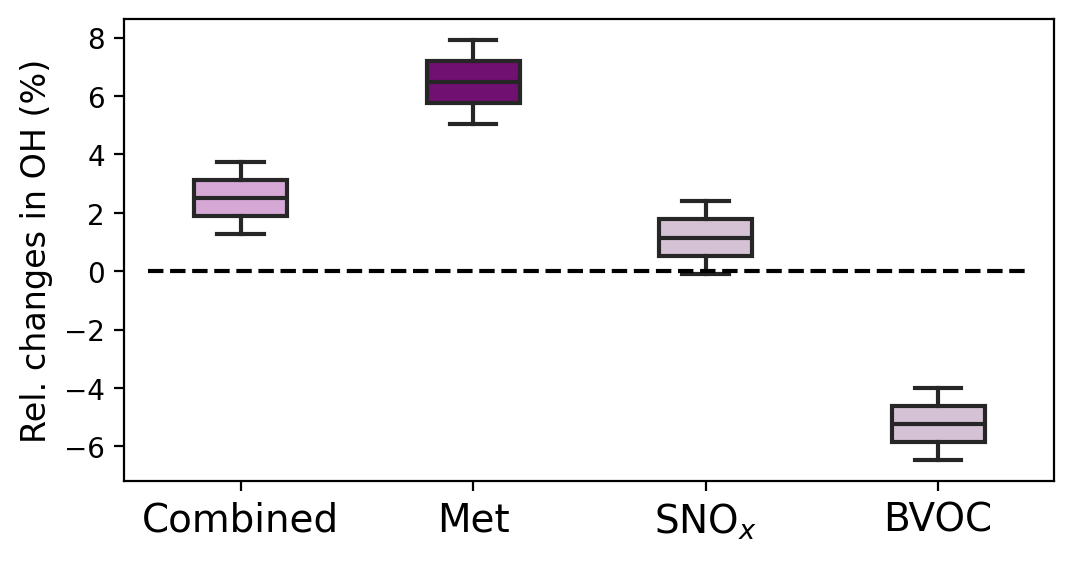

In [18]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)
spcs = ['OH']
pres_opts = ['tt']

i=0
df = generate_df_resp_rel_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")

plot = sns.boxplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Rel. changes in OH (%)',fontsize=12)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k',linestyle='--')
axs.set_xlabel('')
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)

Text(0.5, 0, '')

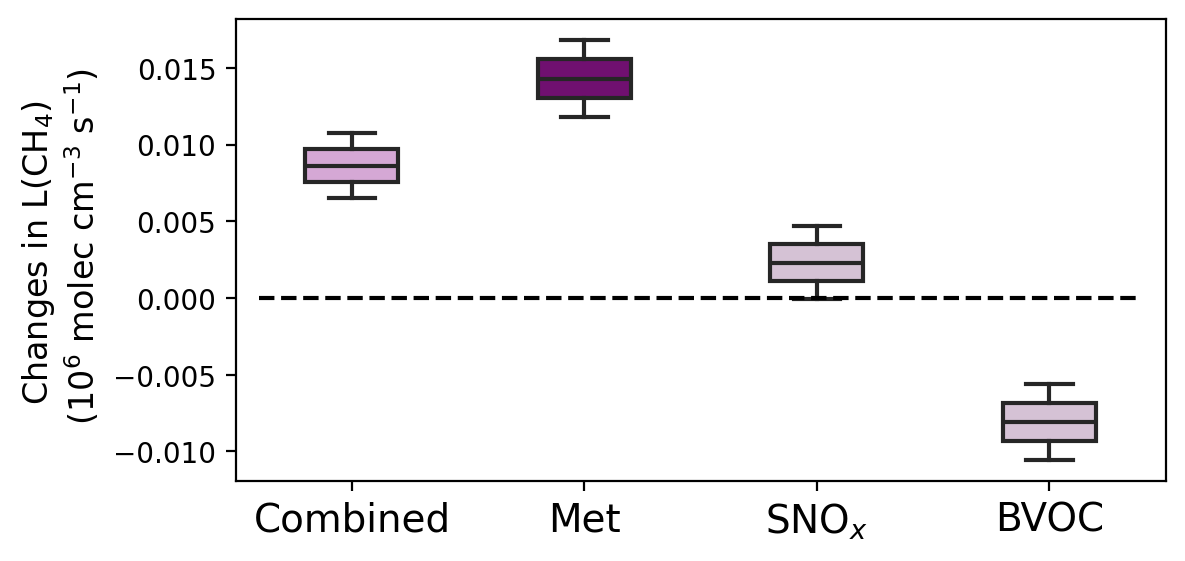

In [32]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)
spcs = ['CH4_CHML']
pres_opts = ['tt']

i=0
df = generate_df_resp_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")
if i==0:
    df[spcs[i]] = df[spcs[i]]/1e6
plot = sns.boxplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Changes in L(CH$_4$) \n (10$^{6}$ molec cm$^{-3}$ s$^{-1}$)',fontsize=12)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k',linestyle='--')
axs.set_xlabel('')
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)

Text(0.5, 0, '')

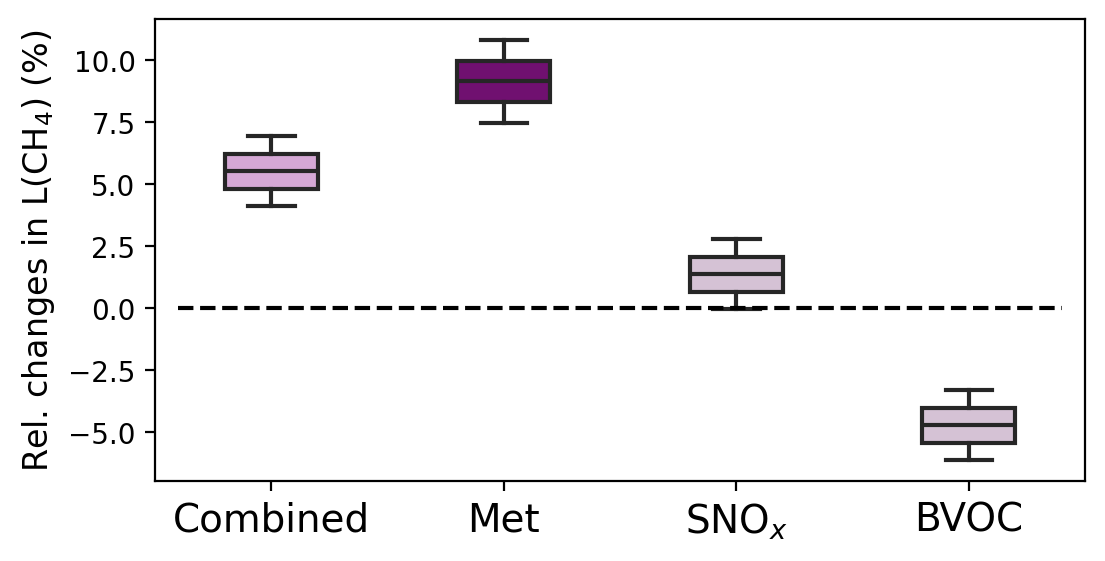

In [14]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)
spcs = ['CH4_CHML']
pres_opts = ['tt']

i=0
df = generate_df_resp_rel_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")

plot = sns.boxplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Rel. changes in L(CH$_4$) (%)',fontsize=12)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k',linestyle='--')
axs.set_xlabel('')
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)

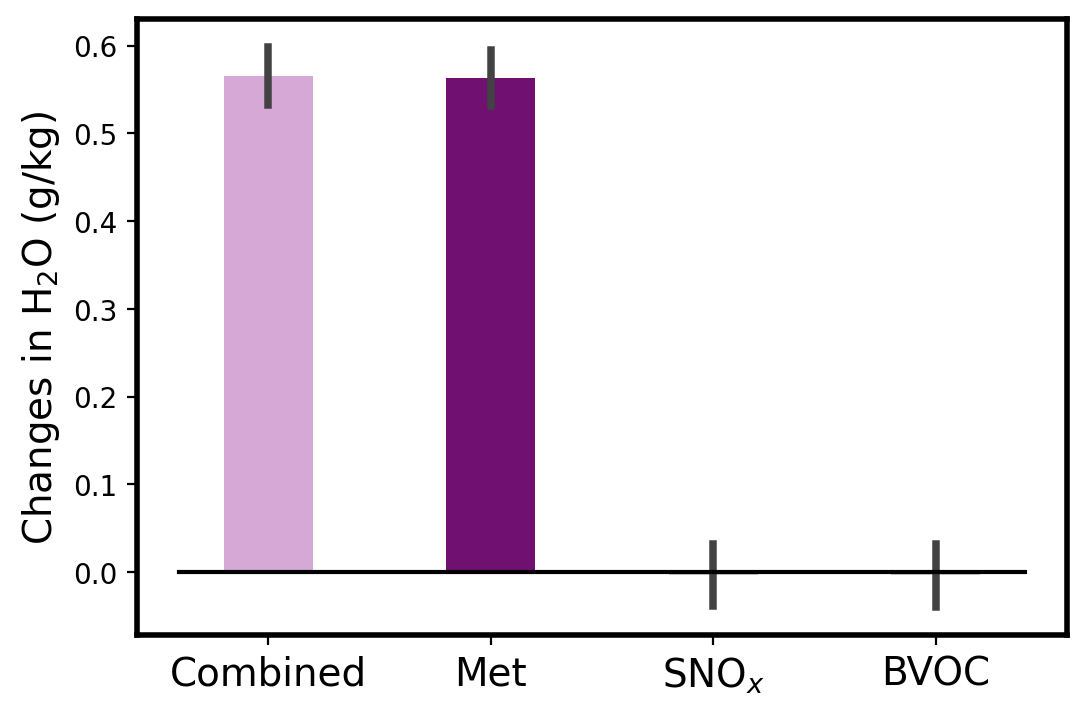

In [6]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,4),dpi=200)
spcs = ['H2O']
pres_opts = ['tt']

i=0
df = generate_df_resp_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")
df[spcs[i]] = df[spcs[i]]*18/28.9647*1e3
plot = sns.barplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Changes in H$_2$O (g/kg)',fontsize=14)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k')
axs.set_xlabel('')
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)

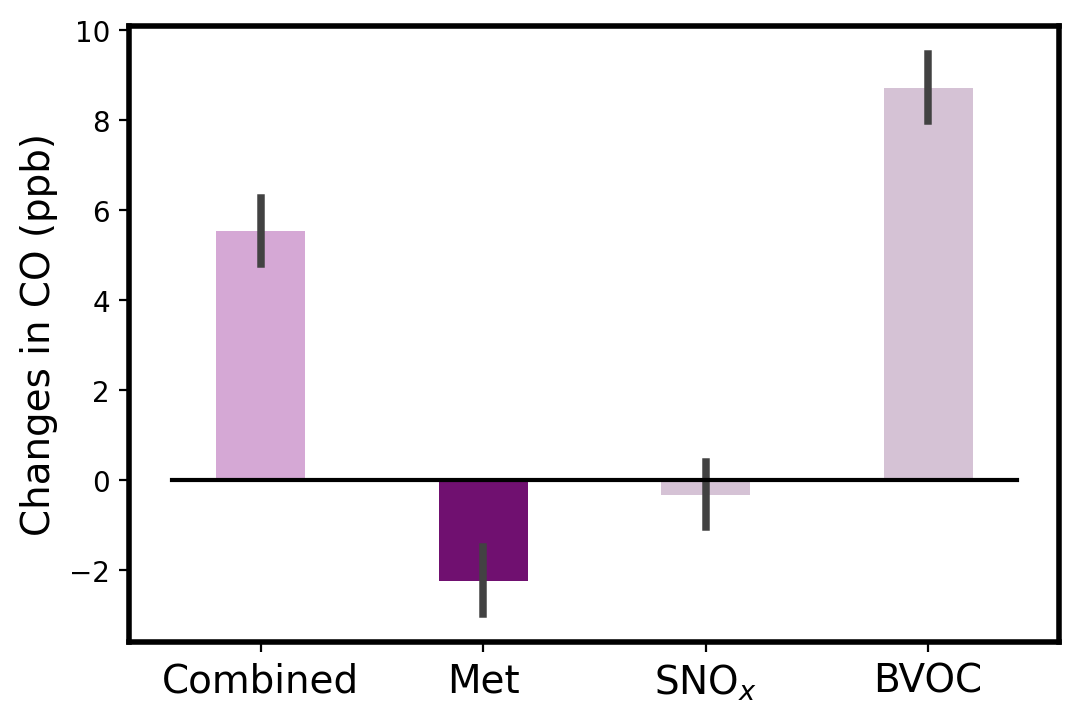

In [7]:
avg_opt = 'mass'
fig, axs = plt.subplots(1,1,figsize=(6,4),dpi=200)
spcs = ['CO']
pres_opts = ['tt']

i=0
df = generate_df_resp_global(spcs[i], 'tt',avg_opt)
df = df.query("region == 'Lat_60'")
df[spcs[i]] = df[spcs[i]]*1e9
plot = sns.barplot(x='model_label',y=spcs[i],data=df,
                ax=axs,
                #palette='Purples_r',
                palette=['plum','purple','thistle','thistle'],
                width=0.4)#,palette=['tab:orange','tab:green'])
axs.set_ylabel('Changes in CO (ppb)',fontsize=14)

axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.plot([-0.4,3.4],[0,0],color='k')
axs.set_xlabel('')
for axis in ['top','bottom','left','right']:
    axs.spines[axis].set_linewidth(2)

In [44]:
filepath = '/home/qdzhu/fs09/Stratocu-planet/Chemistry/Output/dfs/'

#model_labels = ['camchem', 'AquaChem2D-VaryBVOC-ConstSNOx',
#                'AquaChem-VaryBVOC-VarySNOx', 'AquaChem-VaryBVOC-ConstSNOx', 
#                'AquaChem-ConstBVOC-VarySNOx', 'AquaChem-ConstBVOC-ConstSNOx',
#               'AquaChem-SST4wave2','AquaChem-SST4wave4','AquaChem-SST4wave2-SST4wave4']
#model_labels = [ 'AquaChem-ConstBVOC-ConstSNOx','AquaChem-BVOC']


def read_budget_global(pres_label):
    budget_comb = pd.DataFrame()
    for model_label in model_labels:
        filename = '{}_{}_pres_{}_abs_global.csv'.format(model_label, 'budget_avg',pres_label)
        data = pd.read_csv(filepath + filename)
        budget_comb = pd.concat([budget_comb, data])
    budget_comb = budget_comb.rename(columns  = {"Unnamed: 0":"range"})
    budget_comb = budget_comb.query("range == 0").drop(columns=['range'])
    return budget_comb

def read_budget_freq_global(pres_label):

    budget_freq_comb = pd.DataFrame()

    for model_label in model_labels:
        filename = '{}_{}_pres_{}_abs_global.csv'.format(model_label, 'budget_freq',pres_label)
        data = pd.read_csv(filepath + filename)
        budget_freq_comb = pd.concat([budget_freq_comb, data])
    budget_freq_comb = budget_freq_comb.rename(columns  = {"Unnamed: 0":"range"})
    budget_freq_comb = budget_freq_comb.query("range == 0").drop(columns=['range'])
    return budget_freq_comb

In [45]:
model_labels = [ 'AquaChem2D-VaryBVOC-VarySNOx','AquaChem2D-ConstBVOC-ConstSNOx','AquaChem2D-SNOx','AquaChem2D-BVOC']

budget_comb_global = read_budget_global('tt').query("region == 'Global'").query("cls == 'Prod'")
budget_freq_comb_global = read_budget_freq_global('tt').query("region == 'Global'").query("cls == 'Loss'")
budget_comb_global['rate'] = budget_comb_global['rate']/1e4

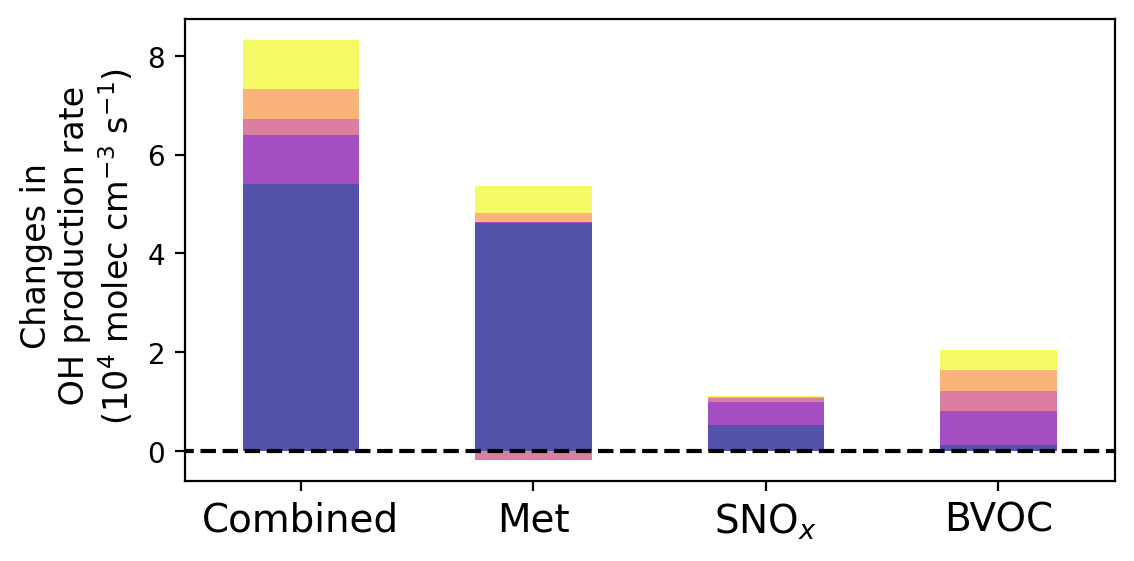

In [46]:
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)

this_data = pd.pivot_table(budget_comb_global, index=['model'], columns=['label'])
this_data=this_data.loc[:,[('rate','2x(O$^1$D+H$_2$O)'),('rate','NO+HO$_2$'),('rate','O$_3$+HO$_2$'),('rate','2xj(H$_2$O$_2$)'),('rate','Other prod')]]

axs.plot([-1,4.5],[0,0],linestyle='--',color='k')
orders = ['AquaChem2D-VaryBVOC-VarySNOx','AquaChem2D-ConstBVOC-ConstSNOx','AquaChem2D-SNOx','AquaChem2D-BVOC']
plot = this_data.loc[orders,:].plot(kind='bar', stacked=True,ax=axs,rot=0,colormap='plasma',edgecolor=None,alpha=0.7)

axs.legend().remove()
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)
axs.set_ylabel('Changes in \n OH production rate\n (10$^{4}$ molec cm$^{-3}$ s$^{-1}$)',fontsize=12)
#axs.set_ylabel('Changes in \n OH production rate\n (Tg/year)',fontsize=14)
#axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
axs.set_xticks([0,1,2,3],['','','',''],fontsize=14)
axs.set_xlabel('')
axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)
#axs.set_ylim([-2,12])


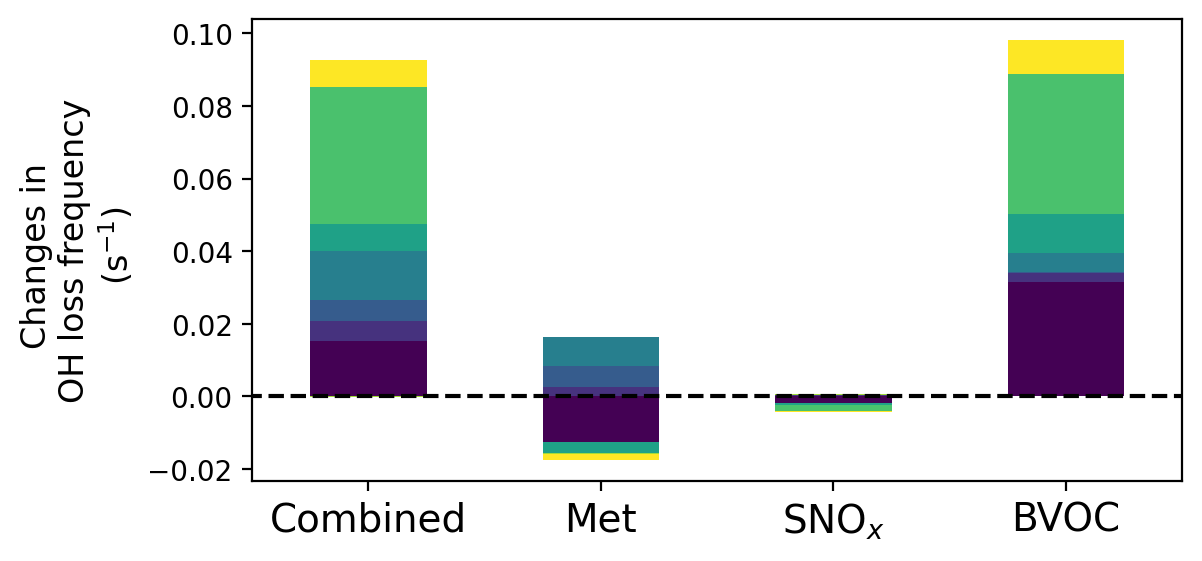

In [50]:
fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=200)

this_data = pd.pivot_table(budget_freq_comb_global, index=['model'], columns=['label'])
this_data=this_data.loc[:,[('rate','CO+OH'),('rate','HOy+OH'),('rate','CH$_4$+OH'),('rate','C1VOC+OH'),('rate','C2VOC+OH'),('rate','ISOP+OH'),('rate','NOy+OH'),('rate','Other loss')]]


axs.plot([-1,4.5],[0,0],linestyle='--',color='k')
orders = ['AquaChem2D-VaryBVOC-VarySNOx','AquaChem2D-ConstBVOC-ConstSNOx','AquaChem2D-SNOx','AquaChem2D-BVOC']
plot = this_data.loc[orders,:].plot(kind='bar', stacked=True,ax=axs,rot=0,colormap='viridis',edgecolor=None)
#axs.legend(['CO+OH','HOy+OH','CH$_4$+OH','C1VOC+OH','>=C2VOC+OH','ISOP+OH','NO$_y$+OH','Others'],
#              ncol=1, bbox_to_anchor=(1.1,1.1))
axs.legend().remove()
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)
axs.set_ylabel('Changes in \nOH loss frequency\n (s$^{-1}$)',fontsize=12)
axs.set_xticks([0,1,2,3],['','','',''],fontsize=14)
axs.set_xlabel('')
axs.set_xticks([0,1,2,3],['Combined','Met','SNO$_x$','BVOC'],fontsize=14)

#axs.set_ylim([-2,12])



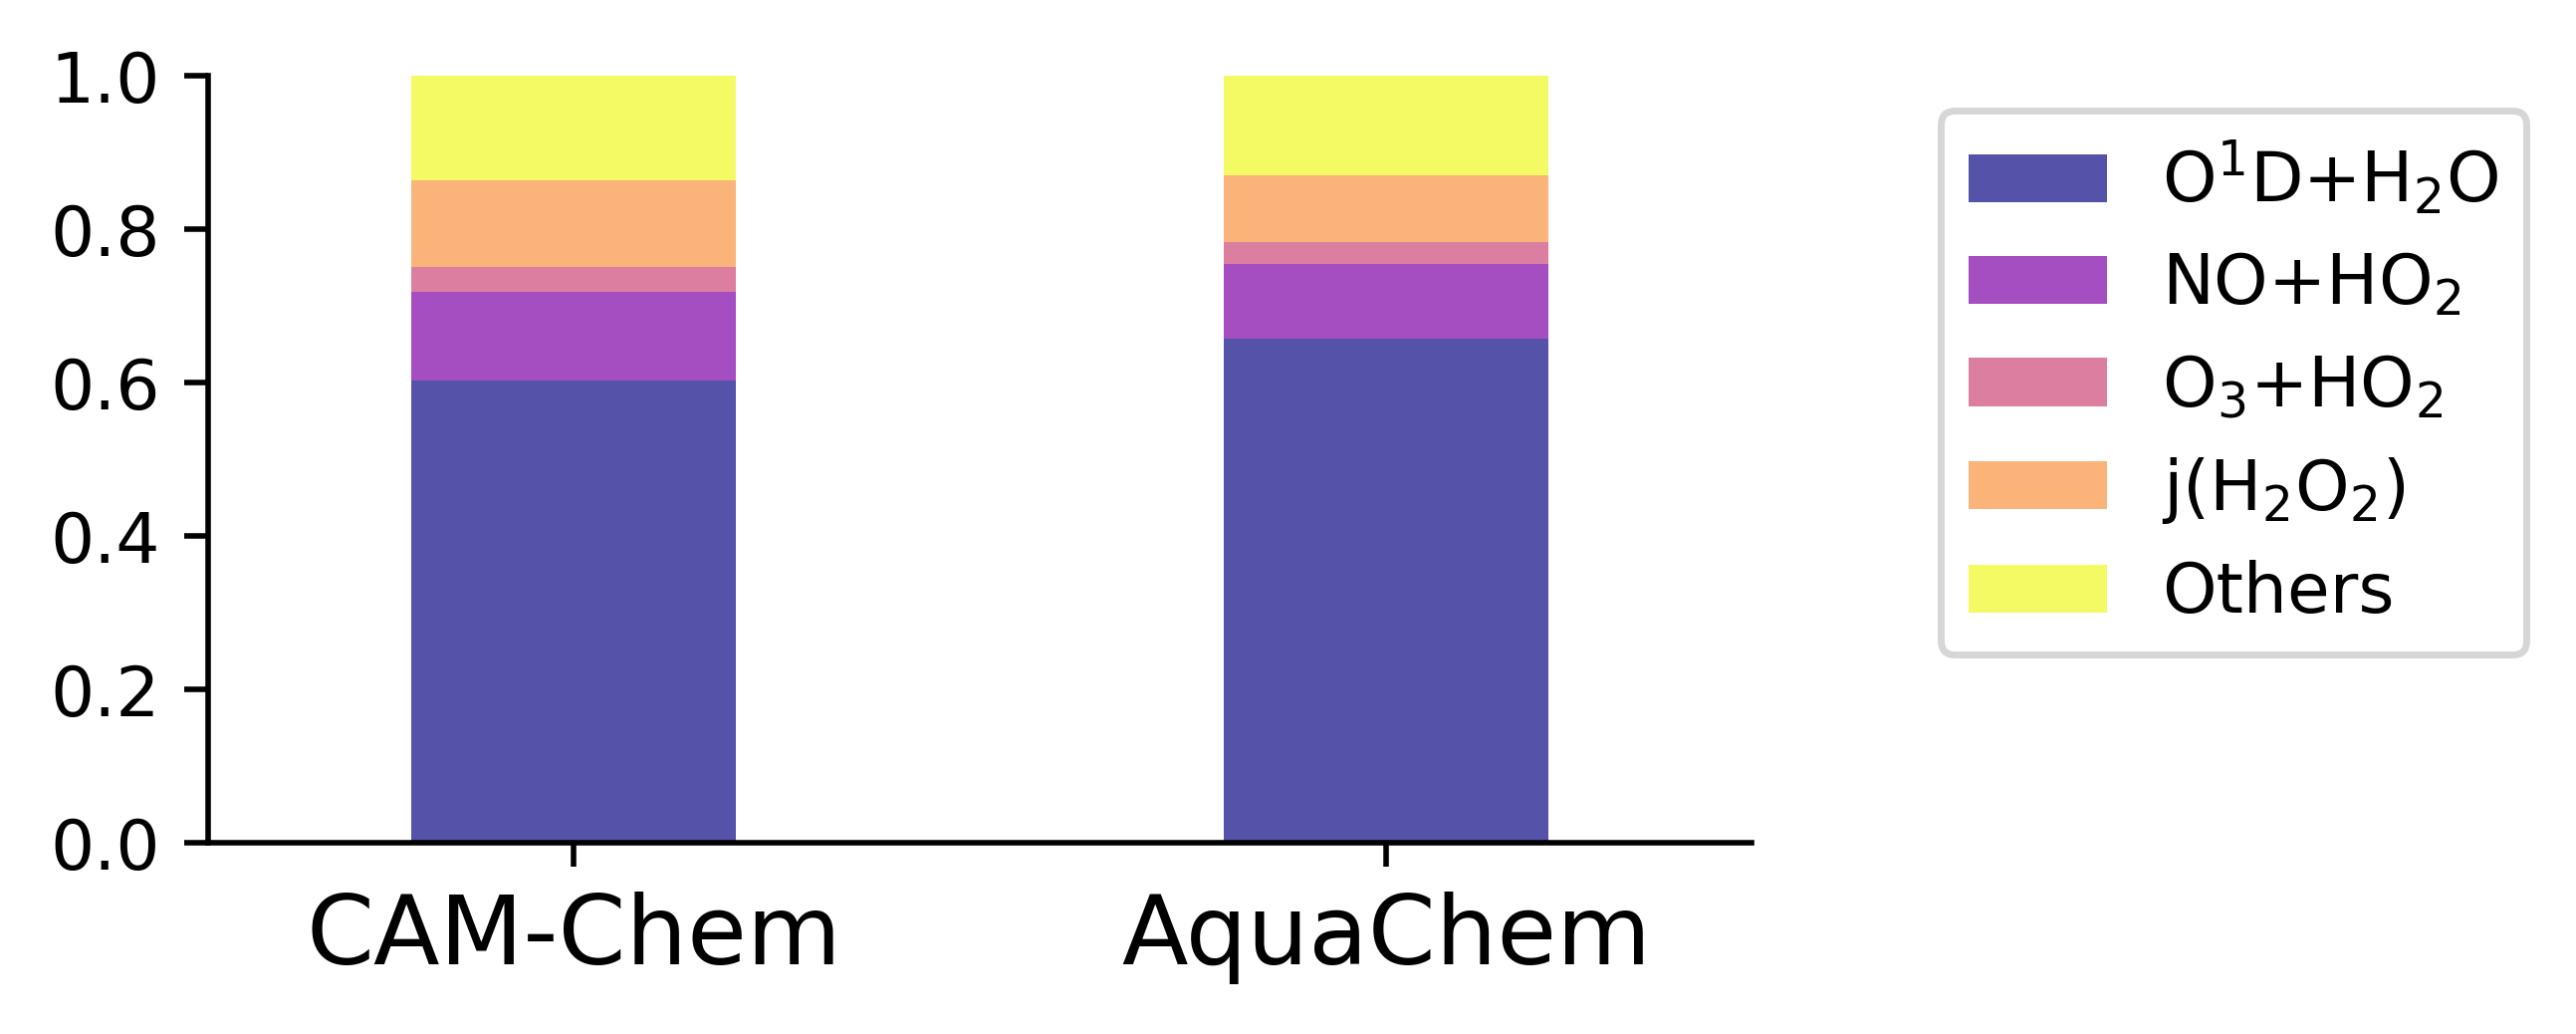

In [40]:
fig, axs = plt.subplots(1,1,figsize=(4,2),dpi=500)

this_data = pd.pivot_table(budget_comb_ratio, index=['model'], columns=['label'])
this_data=this_data.loc[:,[('rate','2x(O$^1$D+H$_2$O)'),('rate','NO+HO$_2$'),('rate','O$_3$+HO$_2$'),('rate','2xj(H$_2$O$_2$)'),('rate','Other prod')]]

orders = ['CAM-Chem','AquaChem2D-VaryBVOC-ConstSNOx']
plot = this_data.loc[orders,:].plot(kind='bar', stacked=True,ax=axs,rot=0,colormap='plasma',linewidth=2,edgecolor=None,width=0.4,alpha=0.7)
axs.legend(['O$^1$D+H$_2$O','NO+HO$_2$','O$_3$+HO$_2$','j(H$_2$O$_2$)','Others'],
              ncol=1, bbox_to_anchor=(1.1,1))
#axs.legend().remove()
#for axis in ['top','bottom','left','right']:
#    axs.spines[axis].set_linewidth(2)
#axs.set_ylabel('Changes in OH production rate',fontsize=14)
axs.set_xticks([0,1],['CAM-Chem','AquaChem'],fontsize=14)
axs.set_xlabel('')
axs.set_ylim([0,1])
axs.spines[['right', 'top']].set_visible(False)

#axs.set_ylim([-2,12])

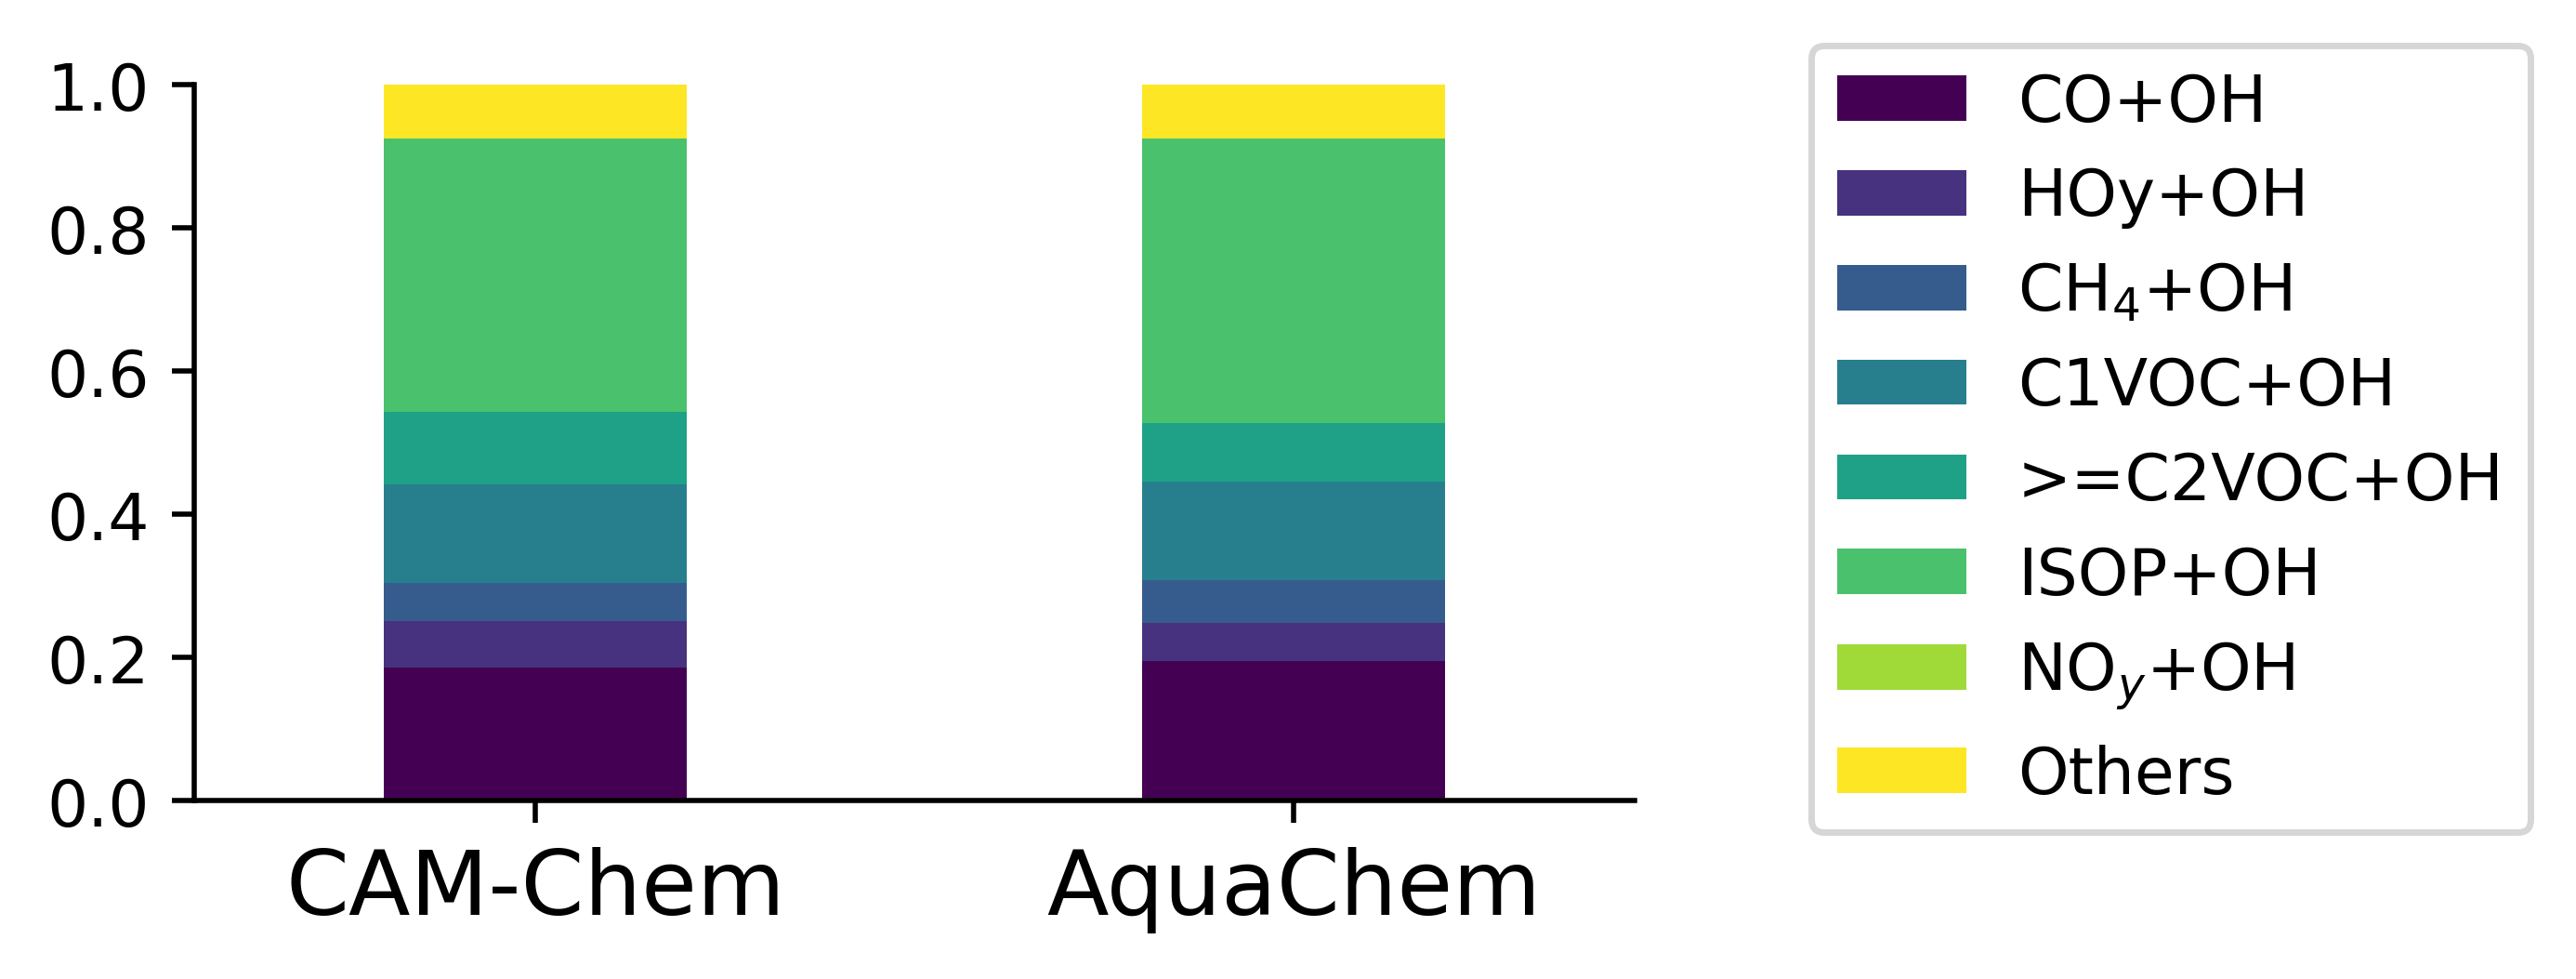

In [42]:
fig, axs = plt.subplots(1,1,figsize=(4,2),dpi=500)

this_data = pd.pivot_table(budget_comb_freq_ratio, index=['model'], columns=['label'])
this_data=this_data.loc[:,[('rate','CO+OH'),('rate','HOy+OH'),('rate','CH$_4$+OH'),('rate','C1VOC+OH'),('rate','C2VOC+OH'),('rate','ISOP+OH'),('rate','NOy+OH'),('rate','Other loss')]]

orders = ['CAM-Chem','AquaChem2D-VaryBVOC-ConstSNOx']
plot = this_data.loc[orders,:].plot(kind='bar', stacked=True,ax=axs,rot=0,colormap='viridis',linewidth=2,edgecolor=None,width=0.4)
axs.legend(['CO+OH','HOy+OH','CH$_4$+OH','C1VOC+OH','>=C2VOC+OH','ISOP+OH','NO$_y$+OH','Others'],
              ncol=1, bbox_to_anchor=(1.1,1.1))
#axs.legend().remove()
#axs.plot([-1,4.5],[0,0],linestyle='--',color='k')

#axs.set_ylabel('Changes in OH loss frequency',fontsize=14)
axs.set_xticks([0,1],['CAM-Chem','AquaChem'],fontsize=14)
axs.set_xlabel('')
axs.set_ylim([0,1])
#axs.set_ylim([-2,12])
axs.spines[['right', 'top']].set_visible(False)
